In [1]:
import os,shutil

In [2]:
original_dataset_dir = '/Users/erfan/Desktop/dogs-vs-cats'

In [3]:
base_dir = '/Users/erfan/Desktop/dogs-vs-cats/database small'

In [4]:
os.mkdir(base_dir)

In [5]:
# Make directories
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [6]:
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [7]:
# Fill directories
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)    
    shutil.copyfile(src, dst)

In [8]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)    
    shutil.copyfile(src, dst)

In [9]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)    
    shutil.copyfile(src, dst)

In [10]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)    
    shutil.copyfile(src, dst)

In [11]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)    
    shutil.copyfile(src, dst)

In [12]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)    
    shutil.copyfile(src, dst)

In [13]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [14]:
from keras.layers import Dense,MaxPooling2D,Conv2D,Flatten
from keras.models import Sequential


In [36]:

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [15]:
from keras import optimizers

In [37]:

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(learning_rate=1e-4),
             metrics=['acc'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [16]:
from keras.preprocessing.image import ImageDataGenerator





In [38]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [39]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150,150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150,150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [40]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('label batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
label batch shape: (20,)


In [41]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=30,
        validation_data=validation_generator,
        validation_steps=50)

Epoch 1/30


C:\Users\erfan\AppData\Local\Temp\ipykernel_11100\2962381116.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


100/100 [==============================] - 4s 30ms/step - loss: 0.6901 - acc: 0.5435 - val_loss: 0.6764 - val_acc: 0.5170
Epoch 2/30
100/100 [==============================] - 3s 29ms/step - loss: 0.6643 - acc: 0.6100 - val_loss: 0.6447 - val_acc: 0.6340
Epoch 3/30
100/100 [==============================] - 3s 29ms/step - loss: 0.6241 - acc: 0.6600 - val_loss: 0.6085 - val_acc: 0.6720
Epoch 4/30
100/100 [==============================] - 3s 29ms/step - loss: 0.5787 - acc: 0.7005 - val_loss: 0.6022 - val_acc: 0.6570
Epoch 5/30
100/100 [==============================] - 3s 29ms/step - loss: 0.5390 - acc: 0.7275 - val_loss: 0.5783 - val_acc: 0.6870
Epoch 6/30
100/100 [==============================] - 3s 30ms/step - loss: 0.5148 - acc: 0.7500 - val_loss: 0.5568 - val_acc: 0.7110
Epoch 7/30
100/100 [==============================] - 3s 29ms/step - loss: 0.4839 - acc: 0.7710 - val_loss: 0.5588 - val_acc: 0.7000
Epoch 8/30
100/100 [==============================] - 3s 30ms/step - loss: 0.452

In [ ]:
model.save('cats_and_dogs_small_1.h5')

In [42]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
loss_value = history.history['loss']
acc_value = history.history['acc']
val_loss_value = history.history['val_loss']
val_acc_value = history.history['val_acc']

epochs = range(1,len(loss_value)+1)

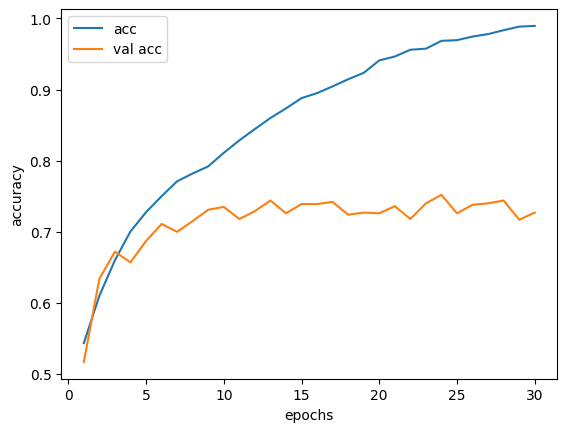

In [44]:
plt.plot(epochs, acc_value, label='acc')
plt.plot(epochs, val_acc_value, label='val acc')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

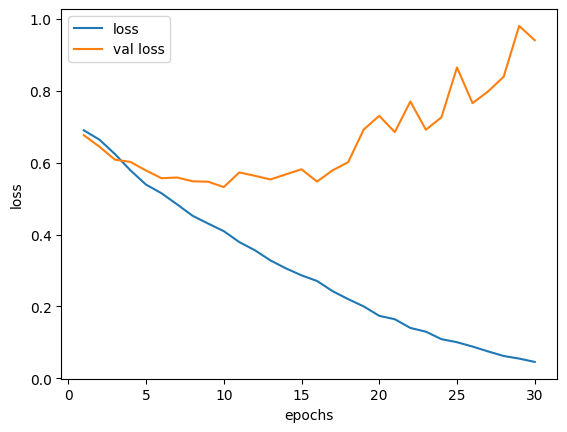

In [45]:
plt.plot(epochs, loss_value, label='loss')
plt.plot(epochs, val_loss_value, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [22]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [23]:
from keras.layers import Dropout


model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [24]:
model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(learning_rate=1e-4),
             metrics=['acc'])

In [27]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150,150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history = model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=100,
        validation_data=validation_generator,
        validation_steps=50)
# train_generator = train_datagen.flow_from_directory(
#         rescale=1./255,
#         rotation_range=40,
#         width_shift_range=0.2,
#         height_shift_range=0.2,
#         shear_range=0.2,
#         zoom_range=0.2,
#         horizontal_flip=True,
#         fill_mode='nearest')

# test_datagen = ImageDataGenerator(rescale=1./255)

# train_generator = train_datagen.flow_from_directory(
#         train_dir,
#         target_size=(150,150),
#         batch_size=20,
#         class_mode='binary')

# validation_generator = test_datagen.flow_from_directory(
#         validation_dir,
#         target_size=(150,150),
#         batch_size=20,
#         class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100


C:\Users\erfan\AppData\Local\Temp\ipykernel_11100\1036620173.py:25: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


100/100 [==============================] - 7s 61ms/step - loss: 0.6853 - acc: 0.5580 - val_loss: 0.6901 - val_acc: 0.5070
Epoch 2/100
100/100 [==============================] - 6s 60ms/step - loss: 0.6823 - acc: 0.5645 - val_loss: 0.6593 - val_acc: 0.6270
Epoch 3/100
100/100 [==============================] - 6s 60ms/step - loss: 0.6787 - acc: 0.5835 - val_loss: 0.6531 - val_acc: 0.6180
Epoch 4/100
100/100 [==============================] - 6s 61ms/step - loss: 0.6697 - acc: 0.5750 - val_loss: 0.6377 - val_acc: 0.6540
Epoch 5/100
100/100 [==============================] - 6s 60ms/step - loss: 0.6512 - acc: 0.6165 - val_loss: 0.6770 - val_acc: 0.5660
Epoch 6/100
100/100 [==============================] - 6s 61ms/step - loss: 0.6487 - acc: 0.6215 - val_loss: 0.6423 - val_acc: 0.6240
Epoch 7/100
100/100 [==============================] - 6s 60ms/step - loss: 0.6390 - acc: 0.6480 - val_loss: 0.6187 - val_acc: 0.6560
Epoch 8/100
100/100 [==============================] - 6s 61ms/step - loss

Epoch 62/100
100/100 [==============================] - 6s 64ms/step - loss: 0.4515 - acc: 0.7885 - val_loss: 0.4266 - val_acc: 0.7980
Epoch 63/100
100/100 [==============================] - 6s 63ms/step - loss: 0.4367 - acc: 0.7965 - val_loss: 0.4295 - val_acc: 0.8090
Epoch 64/100
100/100 [==============================] - 6s 63ms/step - loss: 0.4485 - acc: 0.7905 - val_loss: 0.4683 - val_acc: 0.7890
Epoch 65/100
100/100 [==============================] - 6s 62ms/step - loss: 0.4376 - acc: 0.7945 - val_loss: 0.4146 - val_acc: 0.8170
Epoch 66/100
100/100 [==============================] - 6s 62ms/step - loss: 0.4404 - acc: 0.7940 - val_loss: 0.4401 - val_acc: 0.7860
Epoch 67/100
100/100 [==============================] - 6s 62ms/step - loss: 0.4331 - acc: 0.7985 - val_loss: 0.4211 - val_acc: 0.8040
Epoch 68/100
100/100 [==============================] - 7s 65ms/step - loss: 0.4338 - acc: 0.8045 - val_loss: 0.4140 - val_acc: 0.8160
Epoch 69/100
100/100 [==============================] -

In [28]:
# history = model.fit_generator(
#         train_generator,
#         steps_per_epoch=100,
#         epochs=30,
#         validation_data=validation_generator,
#         validation_steps=50)

In [29]:
loss_value = history.history['loss']
acc_value = history.history['acc']
val_loss_value = history.history['val_loss']
val_acc_value = history.history['val_acc']

epochs = range(1,len(loss_value)+1)

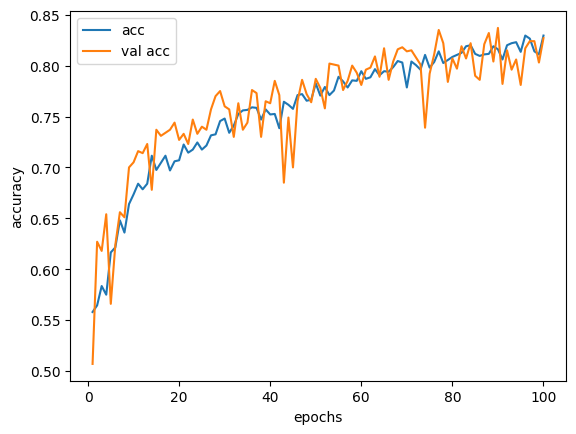

In [30]:
plt.plot(epochs, acc_value, label='acc')
plt.plot(epochs, val_acc_value, label='val acc')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

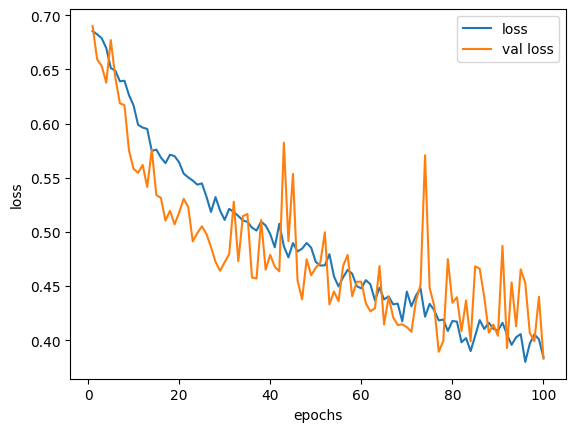

In [31]:
plt.plot(epochs, loss_value, label='loss')
plt.plot(epochs, val_loss_value, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()